# How Do You Use ChatGPT? Check Out How It Changed Over Time!

This notebook is designed to provide insights into the various types of interactions you've had with ChatGPT, categorizing them and visualizing the trends over time. Whether you're interested in tracking the evolution of your queries, understanding the distribution of conversation categories, or simply exploring data visualization techniques, this notebook is a great starting point.

## Key Features:

- **Conversation Categorization**: Utilizing advanced NLP techniques, conversations are categorized into predefined themes, providing a clear view of the dominant topics in your interactions with ChatGPT.
- **Temporal Analysis**: Examine how the frequency and nature of your conversations have evolved from your first interaction to the present day.
- **Dynamic Visualizations**: Interactive and animated histograms and pie charts bring your data to life, showing the shifting landscape of your conversation categories over time.

## Limitations and Acknowledgments:

### Limitations:

- **Categorization Accuracy**: The categorization of conversations is based on thematic similarity with predefined text snippets. This method, while effective, is not foolproof and may not always perfectly capture the essence of each conversation.
- **Data Complexity**: The visualizations and analyses are as good as the data fed into them. Complex or nuanced conversations might be oversimplified in the categorization process.

### Credits:

This notebook and its methodologies were developed by Léonard Boussioux with the help of ChatGPT4. For any questions, suggestions, or feedback, please feel free to reach out via email at [leobix@uw.edu](mailto:leobix@uw.edu) or visit [www.leobix.us](http://www.leobix.us).


In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import defaultdict, Counter

from tqdm import tqdm

In [ ]:
!python -m spacy download en_core_web_md

2023-11-11 19:10:43.032500: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 19:10:43.032571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 19:10:43.032609: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 19:10:43.041682: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 19:10:44.476905: W tensorflow/compiler/

## How does it work?

1. Get your conversations.json file from ChatGPT.
On ChatGPT, go to settings (from your email address on lower left corner), then Data controls > Export data > Go to your email box > Download and unzip file.

2. Upload conversations.json on this Colab session by clicking on Files then the little arrow icon.

3. Run the code below.

In [ ]:
import json
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

# Load Spacy NLP Model with word vectors
nlp = spacy.load("en_core_web_md")

# Predefined thematic texts representing each category
# Important Note: Those categories are probably too tuned to my own profile (heavy Python user). Feel free to twick them! ChatGPT can help you with that.
thematic_texts = {
    "Data Visualization": "plotting matplotlib seaborn graphs charts visualization color plt",
    "Programming": "python code programming import function dataframe df script development",
    "Machine Learning, Data Science, Business Analytics": "machine learning data science model algorithms neural network ai research sklearn pandas business analytics performance metrics kpi forecasting models decision making",
    "Creative AI & Generative Design": "creative ai generative design automation neural networks deep learning art",
    "Technical Research & Methods": "research methods academic papers studies multimodal ensemble forecasting technique",
    "Data Management & Processing": "data management processing cleaning transformation database sql etl big data",
    "Educational": "learning study education tutorial knowledge teaching academics",
    "Personal Advice & Coaching": "life personal advice experience feelings relationships self-improvement",
    "Physical Health & Wellness": "health exercise nutrition diet wellness medical fitness",
    "Mental Health": "mental health mindfulness psychology stress anxiety depression therapy",
    "Science & Technology": "science technology innovation research development scientific tech",
    "Current Events": "news events politics global local current affairs updates breaking",
    "Finance & Economics": "finance economics money investing budgeting economy markets trading",
    "Travel & Geography": "travel geography places cultures exploration tourism countries cities",
    "Food & Cooking": "food cooking recipes cuisine baking meals nutrition culinary",
    "Fashion & Lifestyle": "fashion lifestyle trends clothing style apparel shopping design",
    "Home & Family": "home family parenting children household marriage relationships domestic",
    "Hobbies, Recreation, Entertainment": "hobbies recreation diy crafts leisure activities interests pastime games fun leisure jokes movies music sports",
    # "Others": "miscellaneous general varied assorted diverse" #Uncomment if you want to look into some other usages that don't really fall above.
}

In [ ]:
# Convert thematic texts to vectors
thematic_vectors = {category: nlp(text).vector for category, text in thematic_texts.items()}

In [ ]:
# Load your JSON file
with open('conversations.json', 'r') as file:
    data = json.load(file)

In [ ]:
# Function to categorize a conversation using vector similarity
def categorize_conversation(conversation):
    conversation_vector = nlp(conversation).vector
    similarities = {category: cosine_similarity([conversation_vector], [vector])[0][0]
                    for category, vector in thematic_vectors.items()}
    return max(similarities, key=similarities.get)

In [ ]:
# Function to extract conversation dates
def extract_dates(data):
    dates = []
    for item in data:
        create_time = item.get('create_time')
        if create_time:
            date = datetime.fromtimestamp(create_time)
            dates.append(date.date())
    return dates

# Extract dates and compute first use and average conversations per day
conversation_dates = extract_dates(data)
first_use_date = min(conversation_dates)
total_days = (datetime.now().date() - first_use_date).days
average_conversations_per_day = len(conversation_dates) / total_days

print("First use date:", first_use_date, ". Notice that the chats you had shortly after ChatGPT was released might not have been stored by OpenAI.")
print("You had", len(conversation_dates), "conversations with ChatGPT.")
print("Average conversations per day:", average_conversations_per_day)

First use date: 2022-12-09
You had 1179 conversations with ChatGPT.
Average conversations per day: 3.4985163204747773


In [ ]:
import json
from collections import defaultdict, Counter
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
from datetime import datetime

def extract_conversations_with_dates(data):
    conversations_with_dates = []

    # Function to recursively extract messages and find the earliest date in a conversation
    def extract_message(message_id, mapping, parent_text='', earliest_date=None):
        if message_id in mapping:
            message_info = mapping[message_id]
            message = message_info.get("message")
            text = parent_text

            if message and message.get("content"):
                parts = message["content"].get("parts", [])
                text += " ".join([part for part in parts if isinstance(part, str)]) + " "
                create_time = message.get("create_time")
                if create_time:
                    date = datetime.fromtimestamp(create_time).date()
                    earliest_date = date if not earliest_date or date < earliest_date else earliest_date

            # Recursively process children messages
            for child_id in message_info.get("children", []):
                text, earliest_date = extract_message(child_id, mapping, text, earliest_date)

            return text, earliest_date
        return parent_text, earliest_date

    # Iterate over each conversation item in the data
    for item in data:
        if 'mapping' in item and isinstance(item['mapping'], dict):
            for message_id, message_info in item['mapping'].items():
                if message_info.get("parent") is None:  # Start with root messages
                    conversation_text, date = extract_message(message_id, item['mapping'])
                    if conversation_text.strip() and date:
                        conversations_with_dates.append((conversation_text.strip(), date))

    return conversations_with_dates

# Example usage
conversations_with_dates = extract_conversations_with_dates(data)

# This code will probably take 3-10 minutes to run depending on how many times you used ChatGPT. Time to drink some water and breathe in the meantime!

In [ ]:
# Accumulate category counts over time
category_counts_over_time = defaultdict(Counter)
for conversation, date in tqdm(conversations_with_dates):
    category = categorize_conversation(conversation)
    category_counts_over_time[date][category] += 1

100%|██████████| 1178/1178 [06:55<00:00,  2.84it/s]


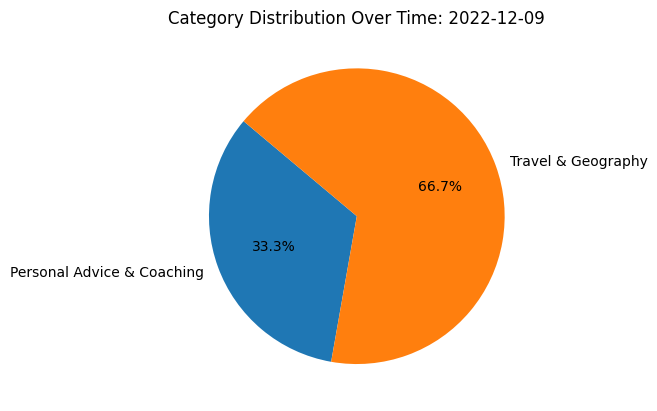

In [ ]:
# Prepare data for animation
sorted_dates = sorted(category_counts_over_time.keys())
cumulative_counts = []
current_count = Counter()
for date in sorted_dates:
    current_count += category_counts_over_time[date]
    cumulative_counts.append(current_count.copy())

# Function to update the pie chart for animation
def update_pie(num, ax):
    ax.clear()
    data = cumulative_counts[num]
    categories, counts = zip(*data.items())
    ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
    ax.set_title('Category Distribution Over Time: ' + str(sorted_dates[num]))

# Create an animation
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update_pie, frames=len(cumulative_counts), fargs=(ax,), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())


In [ ]:
# Prepare data for histogram animation
# We already have 'cumulative_counts' from the previous step

# Convert cumulative counts to a format suitable for histogram
histogram_data = []
for cumulative_count in cumulative_counts:
    data_for_date = []
    for category, count in cumulative_count.items():
        data_for_date.extend([category] * count)
    histogram_data.append(data_for_date)


In [ ]:
# Find the maximum number of conversations for any category across all time
max_conversations = max([count for cumulative in cumulative_counts for count in cumulative.values()])
# Convert cumulative counts to a dictionary format for histogram
histogram_data_dict = []
for cumulative_count in cumulative_counts:
    histogram_data_dict.append(dict(cumulative_count))

In [ ]:
import matplotlib.colors as mcolors

# Get a list of unique categories
all_categories = list(set(cat for count_dict in histogram_data_dict for cat in count_dict.keys()))

# Assign a unique color to each category
colors = list(mcolors.TABLEAU_COLORS)  # Adjust or choose a different colormap if needed
color_map = {category: colors[i % len(colors)] for i, category in enumerate(all_categories)}


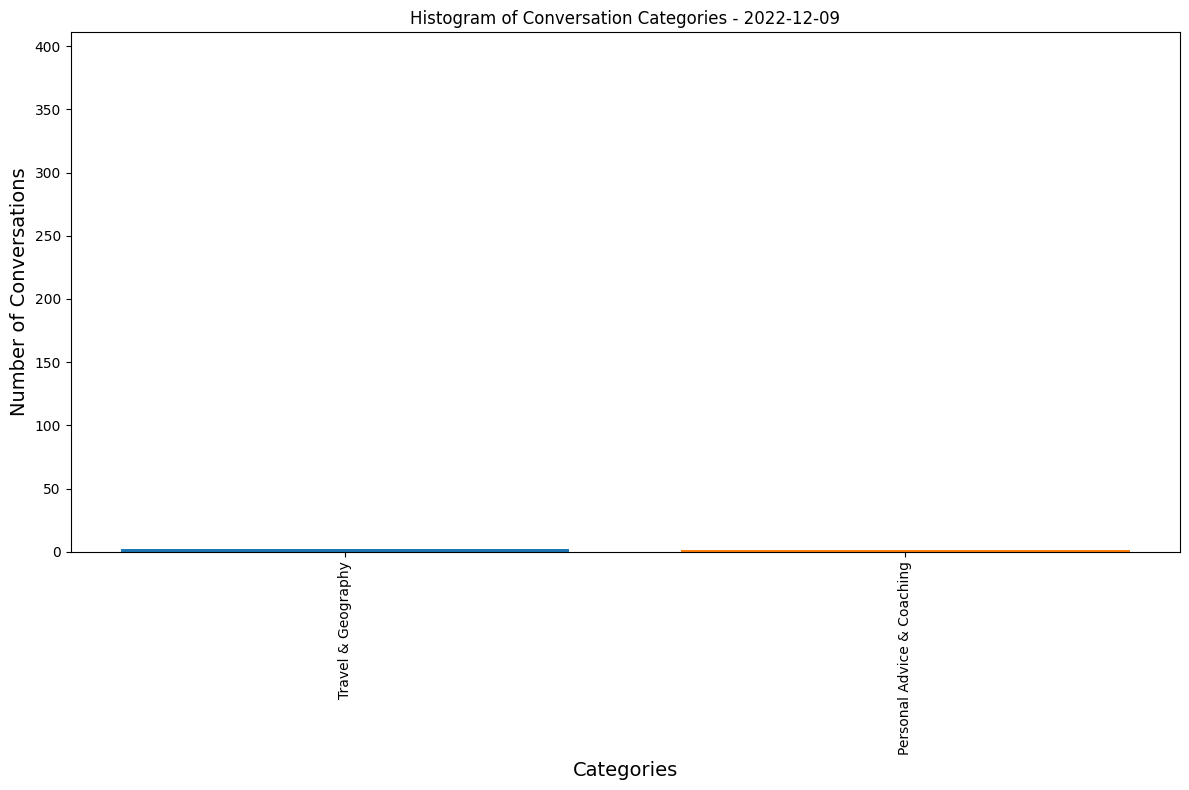

In [ ]:
# Function to update the histogram for animation
def update_hist(num, data, ax, max_y):
    ax.clear()
    current_data = data[num]
    # Order categories by current count
    ordered_categories = sorted(current_data.keys(), key=lambda x: current_data[x], reverse=True)
    counts = [current_data[cat] for cat in ordered_categories]
    colors = [color_map[cat] for cat in ordered_categories]  # Get colors for each category

    ax.bar(ordered_categories, counts, color=colors)
    ax.set_ylim(0, max_y)  # Set the Y-axis limit
    ax.set_xlabel('Categories', fontsize=14)
    ax.set_ylabel('Number of Conversations', fontsize=14)
    ax.set_xticks(range(len(ordered_categories)))  # Set x-ticks position
    ax.set_xticklabels(ordered_categories, rotation=90, fontsize=10)
    ax.set_title(f'Histogram of Conversation Categories - {sorted_dates[num]}')

    plt.tight_layout()  # Adjust layout to make room for category labels

# Create an animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = animation.FuncAnimation(fig, update_hist, frames=len(histogram_data_dict), fargs=(histogram_data_dict, ax, max_conversations), interval=100, repeat=False)

# Display the animation
HTML(ani.to_html5_video())
